# Exploratory Data Analysis

In [15]:
# Import packages
import os
import re
import functools

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from bs4 import BeautifulSoup
from PIL import Image
from collections import Counter
from nltk.corpus import stopwords

## Load data

In [4]:
# Load data
def parse_input(x):
    if os.path.exists("./data/reports/%s.xml" % x):
        f = open("./data/reports/%s.xml" % x, "r")
        soup = BeautifulSoup(f, 'html.parser')
        reports = soup.find(label='FINDINGS').get_text().lower()
        return re.sub(r'[\W]', ' ', reports)

image = pd.Series(os.listdir('./data/images'))
number = image.apply(lambda x: x.split('_')[0][3:])
report = number.apply(parse_input)

In [5]:
df = pd.DataFrame({"Image": image, "Number": number, "Caption": report}).dropna().sort_values(['Number']).reset_index(drop=True)
df.head()

,Image,Number,Caption
0,CXR1_1_IM-0001-4001.png,1,the cardiac silhouette and mediastinum size ar...
1,CXR1_1_IM-0001-3001.png,1,the cardiac silhouette and mediastinum size ar...
2,CXR10_IM-0002-2001.png,10,the cardiomediastinal silhouette is within nor...
3,CXR10_IM-0002-1001.png,10,the cardiomediastinal silhouette is within nor...
4,CXR100_IM-0002-2001.png,100,both lungs are clear and expanded heart and m...


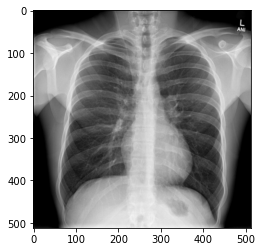

the heart size and pulmonary vascularity appear within normal limits  lungs are free of focal airspace disease  no pleural effusion or pneumothorax is seen  vp shunt tubing is identified  the bony structures  as visualized  appear unremarkable 



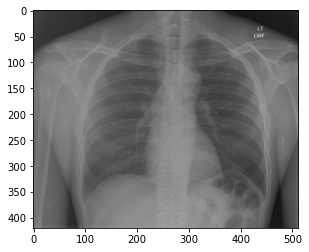

the heart size and mediastinal contours appear within normal limits  no focal airspace consolidation  pleural effusion or pneumothorax  no acute bony abnormalities 



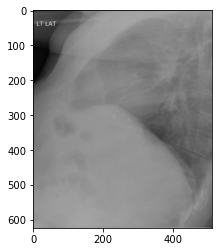

stable cardiomediastinal silhouette  mild patchy right upper lobe opacities  similar to slightly improved from xxxx  left lung clear  no pleural effusion or pneumothorax 



In [6]:
for i in range(3):
    file_name = np.random.choice(df.Image)
    img = Image.open('./data/images/' + file_name)
    plt.imshow(img)
    plt.show()
    print(df[df.Image == file_name].Caption.item())
    print()

## Visualization

In [11]:
texts = functools.reduce(lambda a, b: a+b, df.Caption).split()
texts = [i for i in texts if i not in set(stopwords.words('english'))]
words_counter = Counter(texts)

In [13]:
words_counter.most_common()

[('normal', 6692),
 ('pleural', 4750),
 ('pneumothorax', 4604),
 ('xxxx', 4575),
 ('effusion', 4305),
 ('heart', 4056),
 ('lungs', 3746),
 ('size', 3666),
 ('focal', 3349),
 ('within', 2929),
 ('clear', 2876),
 ('limits', 2827),
 ('pulmonary', 2285),
 ('consolidation', 2053),
 ('silhouette', 1885),
 ('right', 1768),
 ('mediastinal', 1624),
 ('airspace', 1582),
 ('cardiomediastinal', 1567),
 ('left', 1527),
 ('acute', 1315),
 ('lung', 1257),
 ('spine', 1169),
 ('disease', 1142),
 ('stable', 1132),
 ('changes', 1120),
 ('mediastinum', 1116),
 ('unremarkable', 1110),
 ('structures', 1104),
 ('contours', 1044),
 ('thoracic', 1019),
 ('bony', 1009),
 ('contour', 988),
 ('degenerative', 892),
 ('large', 867),
 ('mild', 858),
 ('without', 837),
 ('seen', 821),
 ('osseous', 773),
 ('appear', 768),
 ('cardiac', 763),
 ('calcified', 757),
 ('opacity', 747),
 ('effusions', 744),
 ('vascularity', 737),
 ('intact', 714),
 ('abnormality', 681),
 ('evidence', 664),
 ('visualized', 640),
 ('upper', 63